In [18]:
import pandas as pd
import numpy as np
import io
import requests

In [19]:
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')), sep='\t', header=0)

In [20]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


How much was the revenue for the period in the dataset?

In [21]:
df['item_price'] = df['item_price'].replace({'\$':''}, regex=True).astype(float)
df['quantity'] = df['quantity'].astype(float)
# revenue = (df['item_price']*df['quantity']).sum()
# revenue

In [22]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1.0,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1.0,Izze,[Clementine],3.39
2,1,1.0,Nantucket Nectar,[Apple],3.39
3,1,1.0,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2.0,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [25]:
df.groupby('order_id')['item_price'].sum().max()

205.25

In [27]:
dfgp = df.groupby('order_id')['item_price'].sum()
dfgp.sort_values(ascending=False)

order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
         ...  
1475     10.08
1494     10.08
100      10.08
1122     10.08
113      10.08
Name: item_price, Length: 1834, dtype: float64

In [28]:
df.item_name.unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [46]:
#'Side of Chips', 'Canned Soda'
# df_chips_sode = df[(df['item_name'] == 'Side of Chips') | (df['item_name'] == 'Canned Soda')]
# df_chips_sode
count = 0
idgp = df.groupby('order_id')
features = ['Side of Chips', 'Canned Soda']
for n, g in idgp:
    items = g['item_name'].values 
    if ('Side of Chips' in items) and ('Canned Soda' in items):
        count += 1
count

15

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1.0,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1.0,Izze,[Clementine],3.39
2,1,1.0,Nantucket Nectar,[Apple],3.39
3,1,1.0,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2.0,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


<AxesSubplot:>

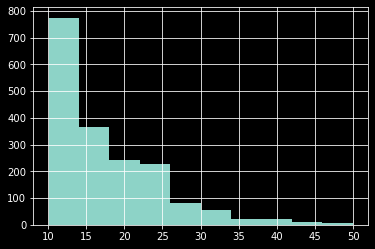

In [54]:
df_plt = dfgp.sort_values(ascending=False)
df_plt[df_plt <= 50].hist()

In [51]:
df_plt

order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
         ...  
1475     10.08
1494     10.08
100      10.08
1122     10.08
113      10.08
Name: item_price, Length: 1834, dtype: float64

How many orders were made in the period?

In [6]:
len(df['order_id'].astype(int).unique())

1834

In [7]:
len(df['order_id'].unique())

1834

What is the average order cost?

In [8]:
revenue/1834

21.39423118865867

What is the price of each item? Sort by the name of the item.

In [9]:
dfitems = df.copy() #.drop_duplicates(subset=['item_name']).copy()
#dfitems.dropna(inplace=True)
dfitems['price_per_item'] = dfitems['item_price']/dfitems['quantity']
dfitems[['item_name','item_price','price_per_item']].sort_values('item_name')

,item_name,item_price,price_per_item
3389,6 Pack Soft Drink,12.98,6.49
341,6 Pack Soft Drink,6.49,6.49
1849,6 Pack Soft Drink,6.49,6.49
1860,6 Pack Soft Drink,6.49,6.49
2713,6 Pack Soft Drink,6.49,6.49
...,...,...,...
2384,Veggie Soft Tacos,8.75,8.75
781,Veggie Soft Tacos,8.75,8.75
2851,Veggie Soft Tacos,8.49,8.49
1699,Veggie Soft Tacos,11.25,11.25


What was the quantity of the most expensive item ordered?


In [10]:
dfitems[['item_name','item_price','price_per_item']].sort_values('price_per_item',ascending=False)

,item_name,item_price,price_per_item
2442,Barbacoa Salad Bowl,11.89,11.89
2957,Steak Salad Bowl,11.89,11.89
613,Steak Salad Bowl,23.78,11.89
2401,Steak Salad Bowl,11.89,11.89
281,Steak Salad Bowl,23.78,11.89
...,...,...,...
378,Canned Soda,1.09,1.09
1805,Canned Soda,1.09,1.09
2520,Canned Soda,1.09,1.09
2981,Bottled Water,1.09,1.09


In [17]:
dfitems.loc[dfitems['item_price'].idxmax()]

order_id                                      1443
quantity                                        15
item_name             Chips and Fresh Tomato Salsa
choice_description                             NaN
item_price                                   44.25
price_per_item                                2.95
Name: 3598, dtype: object

In [39]:
#most_exp_item = dfitems.loc[dfitems['item_price'].idxmax()]['item_name']
items = dfitems[dfitems['item_price'] == dfitems['item_price'].max()]['item_name'].values
dfgp = df.groupby('item_name')
ttl_quantity = 0
for n, gp in dfgp:
    if n in items:
        print(gp[['item_name','item_price','quantity']].head())
        ttl_quantity += gp['quantity'].sum()
ttl_quantity

                item_name  item_price  quantity
1229  Barbacoa Salad Bowl       11.89       1.0
1326  Barbacoa Salad Bowl       11.89       1.0
1418  Barbacoa Salad Bowl        9.39       1.0
1421  Barbacoa Salad Bowl        9.39       1.0
1825  Barbacoa Salad Bowl        9.39       1.0
                item_name  item_price  quantity
1132  Carnitas Salad Bowl       11.89       1.0
1865  Carnitas Salad Bowl        9.39       1.0
2610  Carnitas Salad Bowl       11.89       1.0
3115  Carnitas Salad Bowl        9.39       1.0
3749  Carnitas Salad Bowl       11.89       1.0
            item_name  item_price  quantity
281  Steak Salad Bowl       23.78       2.0
606  Steak Salad Bowl       11.89       1.0
607  Steak Salad Bowl        9.39       1.0
613  Steak Salad Bowl       23.78       2.0
749  Steak Salad Bowl       11.89       1.0


47.0

How many times was a Veggie Salad Bowl ordered?

In [25]:
df['item_name'].value_counts()['Veggie Salad Bowl']

18

How many times was more than one Canned Soda ordered?

In [26]:
df[df['quantity'] > 1].item_name.value_counts()['Canned Soda']

20

### Step 9. Which was the most ordered item?


In [9]:
df.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64